In [30]:
# 분류
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB


In [3]:
df_train['survived'].value_counts()

0    563
1    353
Name: survived, dtype: int64

<AxesSubplot:>

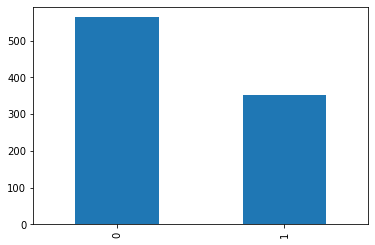

In [5]:
df_train['survived'].value_counts().plot.bar()

<AxesSubplot:xlabel='pclass,survived'>

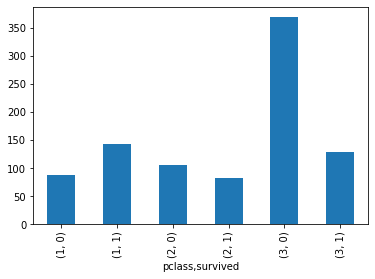

In [13]:
df_train[['pclass','survived']].value_counts().sort_index().plot.bar()

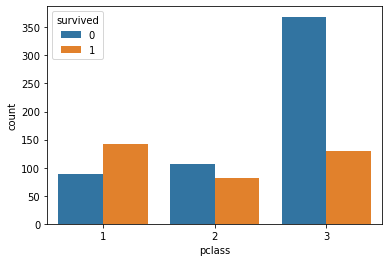

In [10]:
ax = sns.countplot(x='pclass', hue = 'survived', data = df_train)

<AxesSubplot:xlabel='sex,survived'>

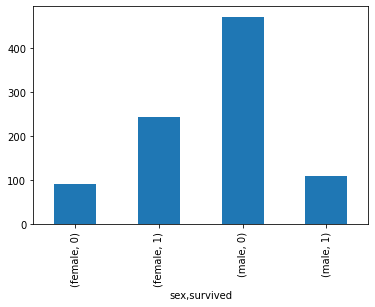

In [14]:
df_train[['sex','survived']].value_counts().sort_index().plot.bar()

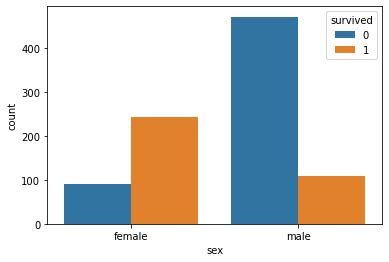

In [11]:
ax = sns.countplot(x='sex', hue = 'survived', data = df_train)

In [ ]:
# 분류
# 결측치 처리
- 삭제 : 처리가 쉽지만, 중요정보 삭제
# 변경
- 평균값 또는 중앙값, 최빈값으로 처리

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB


In [31]:
age_mean = df_train['age'].mean(skipna = True)
age_mean

30.23144399460189

In [51]:
df_train['age'] = df_train['age'].fillna(age_mean)
age_mean = df_train['age'].mean(skipna = False)
df_test['age'] = df_test['age'].fillna(age_mean)
df_train['age']

0      13.000000
1       4.000000
2      30.000000
3      30.231444
4      22.000000
         ...    
911     0.170000
912    30.231444
913    30.231444
914    20.000000
915    32.000000
Name: age, Length: 916, dtype: float64

In [37]:
df_train['embarked'].isnull().value_counts()

False    914
True       2
Name: embarked, dtype: int64

In [47]:
replace_embarked = df_train['embarked'].value_counts().index[-1]
# indxmax()

In [52]:
df_train['embarked'] = df_train['embarked'].fillna(replace_embarked)
df_test['embarked'] = df_test['embarked'].fillna(replace_embarked)

In [49]:
df_train['embarked']

0      S
1      S
2      C
3      Q
4      Q
      ..
911    S
912    S
913    Q
914    S
915    Q
Name: embarked, Length: 916, dtype: object

In [54]:
# df_train = df_train.drop(['name','ticket','body','cabin','home.dest'], axis=1)
df_test = df_test.drop(['name','ticket','body','cabin','home.dest'], axis=1)

In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    393 non-null    int64  
 1   survived  393 non-null    int64  
 2   sex       393 non-null    object 
 3   age       393 non-null    float64
 4   sibsp     393 non-null    int64  
 5   parch     393 non-null    int64  
 6   fare      393 non-null    float64
 7   embarked  393 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 24.7+ KB


In [57]:

whole_df = df_train.append(df_test)
whole_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 392
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
 7   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 92.0+ KB


In [58]:
train_num = len(df_train)

In [59]:
whole_df_encoded = pd.get_dummies(whole_df)
whole_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 392
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   age         1309 non-null   float64
 3   sibsp       1309 non-null   int64  
 4   parch       1309 non-null   int64  
 5   fare        1309 non-null   float64
 6   sex_female  1309 non-null   uint8  
 7   sex_male    1309 non-null   uint8  
 8   embarked_C  1309 non-null   uint8  
 9   embarked_Q  1309 non-null   uint8  
 10  embarked_S  1309 non-null   uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 78.0 KB


In [61]:
df_train = whole_df_encoded[:train_num]
df_test = whole_df_encoded[train_num:]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      916 non-null    int64  
 1   survived    916 non-null    int64  
 2   age         916 non-null    float64
 3   sibsp       916 non-null    int64  
 4   parch       916 non-null    int64  
 5   fare        916 non-null    float64
 6   sex_female  916 non-null    uint8  
 7   sex_male    916 non-null    uint8  
 8   embarked_C  916 non-null    uint8  
 9   embarked_Q  916 non-null    uint8  
 10  embarked_S  916 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 54.6 KB


In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 392
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      393 non-null    int64  
 1   survived    393 non-null    int64  
 2   age         393 non-null    float64
 3   sibsp       393 non-null    int64  
 4   parch       393 non-null    int64  
 5   fare        393 non-null    float64
 6   sex_female  393 non-null    uint8  
 7   sex_male    393 non-null    uint8  
 8   embarked_C  393 non-null    uint8  
 9   embarked_Q  393 non-null    uint8  
 10  embarked_S  393 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 23.4 KB


In [64]:
y_train = df_train['survived']
x_train = df_train.drop(['survived'], axis=1)
y_test = df_test['survived']
x_test = df_test.drop(['survived'], axis=1)

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [66]:
y_pred = lr.predict(x_test)

In [67]:
# 평가
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)

[[214  32]
 [ 48  99]]
